In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline
from glob import glob

In [2]:
data = np.load('./data/data_14400_norm.npz')

In [4]:
X = data['arr_0']
y = data['arr_1']

In [5]:
X1 = X - X.mean(axis=0)

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components = None, whiten=True,svd_solver='auto')

In [8]:
x_pca = pca.fit_transform(X1)

In [9]:
x_pca.shape

(223, 223)

In [10]:
eigen_ratio = pca.explained_variance_ratio_
eigen_ratio_cum = np.cumsum(eigen_ratio)

Text(0, 0.5, 'Explained Variance')

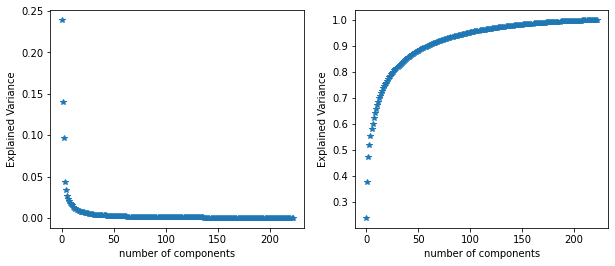

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio,'*')
plt.xlabel('number of components')
plt.ylabel('Explained Variance')
plt.subplot(1,2,2)
plt.plot(eigen_ratio_cum,'*')
plt.xlabel('number of components')
plt.ylabel('Explained Variance')

Weźmiemy pod uwagę 50 komponentów, które tłumaczą około 90% wariancji.

In [21]:
pca_50 = PCA(n_components = 50, whiten=True,svd_solver='auto')

In [22]:
x_pca_50 = pca_50.fit_transform(X1)

In [23]:
x_pca_50.shape

(223, 50)

In [26]:
import pickle
pickle.dump(pca_50, open('./model/pca_50.pickle','wb'))

In [27]:
x_pca_inv = pca_50.inverse_transform(x_pca_50)

In [28]:
x_pca_inv.shape

(223, 14400)

In [30]:
eig_img = x_pca_inv[0,:]
eig_img = eig_img.reshape((120,120))
eig_img.shape

(120, 120)

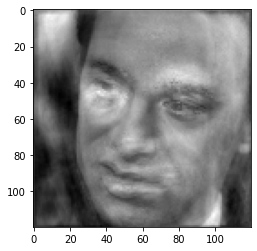

In [32]:
plt.imshow(eig_img, cmap='gray')

In [33]:
np.savez('./data/data_pca_50_y_mean.pickle',x_pca_50,y,X.mean(axis=0))